In [2]:
#Import the libraries
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt

In [1]:
from google.colab import files
file_handle = files.upload()

Saving GameStats.csv to GameStats.csv


In [20]:
GameStats_exp= pd.read_csv("GameStats.csv")

In [21]:

GameStats_exp

,Age,Killsdeathratio,Materials Collected,Time Played,ScoreBoard,Total Victories,Matches Played,Unnamed: 7
0,7,2.4,2,1.0,13000,2,10,NaN
1,13,3.1,3,1.0,12500,3,10,NaN
2,18,3.1,5,7.0,40000,10,50,NaN
3,23,2.6,5,NaN,23000,7,40,NaN
4,28,3.5,4,5.0,13000,6,30,NaN
5,33,2.1,2,4.0,13000,7,20,NaN
6,38,2.4,4,5.0,30000,7,20,NaN
7,43,1.2,2,3.0,23400,9,20,NaN
8,50,5.0,5,3.0,12000,3,10,NaN
9,55,1.0,7,3.0,13000,3,10,NaN


In [22]:
#Collecting x and y
x= GameStats_exp['Age'].values
y=GameStats_exp['Killsdeathratio'].values

In [23]:
print(x)
print(y)

[ 7 13 18 23 28 33 38 43 50 55 60]
[2.4 3.1 3.1 2.6 3.5 2.1 2.4 1.2 5.  1.  2.2]


In [24]:

#Mean of x,y

mean_x= np.mean(x)
mean_y=np.mean(y)

# Total Number of values
n=len(x)

#To find model coefficients b1,b0 or m,c in y=mx+c

numerator=0
denominator=0

for i in range (n):
    numerator += (x[i] - mean_x)*(y[i] - mean_y)
    denominator += (x[i] - mean_x) ** 2

b1=numerator / denominator
b0=mean_y = (b1 * mean_x)

print(b1,b0)

-0.012128255557542164 -0.40574527683413786


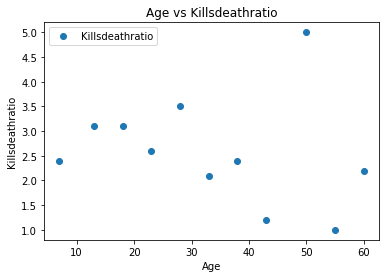

In [25]:
# Plotting the distribution of scores
GameStats_exp.plot(x='Age', y='Killsdeathratio', style='o')  

plt.title('Age vs Killsdeathratio')  
plt.xlabel('Age')  
plt.ylabel('Killsdeathratio')  
plt.show()

In [26]:
GameStats_exp.corr()

,Age,Killsdeathratio,Materials Collected,Time Played,ScoreBoard,Total Victories,Matches Played,Unnamed: 7
Age,1.000000,-0.192738,0.593410,-0.003245,-0.245010,-0.136980,-0.376611,NaN
Killsdeathratio,-0.192738,1.000000,0.029766,0.136476,-0.060711,-0.157664,0.112481,NaN
Materials Collected,0.593410,0.029766,1.000000,0.140892,-0.007915,-0.234422,0.032442,NaN
Time Played,-0.003245,0.136476,0.140892,1.000000,0.741387,0.791863,0.882950,NaN
ScoreBoard,-0.245010,-0.060711,-0.007915,0.741387,1.000000,0.801395,0.761048,NaN
Total Victories,-0.136980,-0.157664,-0.234422,0.791863,0.801395,1.000000,0.801930,NaN
Matches Played,-0.376611,0.112481,0.032442,0.882950,0.761048,0.801930,1.000000,NaN
Unnamed: 7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
#training
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

x=x.reshape((n,1))
reg = LinearRegression()
reg=reg.fit(x,y)
y_pred=reg.predict(x)
r2_score = reg.score(x,y)
print(r2_score)

0.03714780261829975


In [28]:
#Split data into training and testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=1/3, random_state=0)

In [29]:
#Fit Simple Linear Regression to Training Data
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x_train, y_train)

#Make Prediction
y_pred = lm.predict(x_test)

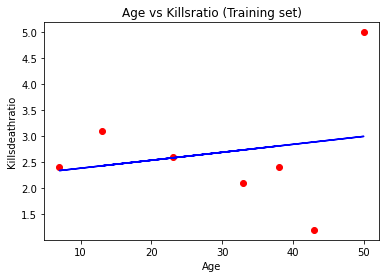

In [30]:
#Visualize training set results

# plot the actual data points of training set
plt.scatter(x_train, y_train, color = 'red')
# plot the regression line
plt.plot(x_train, lm.predict(x_train), color='blue')
plt.title('Age vs Killsratio (Training set)')
plt.xlabel('Age')
plt.ylabel('Killsdeathratio')
plt.show()

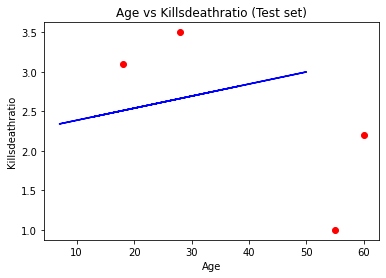

In [31]:

#Visualize test set results

# plot the actual data points of test set
plt.scatter(x_test, y_test, color = 'red')
# plot the regression line (same as above)
plt.plot(x_train, lm.predict(x_train), color='blue')
plt.title('Age vs Killsdeathratio (Test set)')
plt.xlabel('Age')
plt.ylabel('Killsdeathratio')
plt.show()

In [32]:
new_Game_pred = lm.predict([[40]])
print('The predicted K/D of a 40 year old is ',new_salary_pred)

The predicted K/D of a 40 year old is  [2.84519613]


In [33]:

# Comparing Actual vs Predicted
final = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
final

,Actual,Predicted
0,3.5,2.661683
1,1.0,3.074588
2,3.1,2.508755
3,2.2,3.151052


In [34]:
print("By:")
print("Monish Kumar K")
print("CSE IOT")
print("RA1911032020027")

By:
Monish Kumar K
CSE IOT
RA1911032020027
